# Sandbox statistics

The goal of this notebook is to play with statistics in R and learn more about it. Examples and try out were done while cruising through the folowing statistics guide:
https://bookdown.org/mike/data_analysis/descriptive-stat.html

## Graphical Mesures

Warning message in (function (z, notch = FALSE, width = NULL, varwidth = FALSE, :
“some notches went outside hinges ('box'): maybe set notch=FALSE”


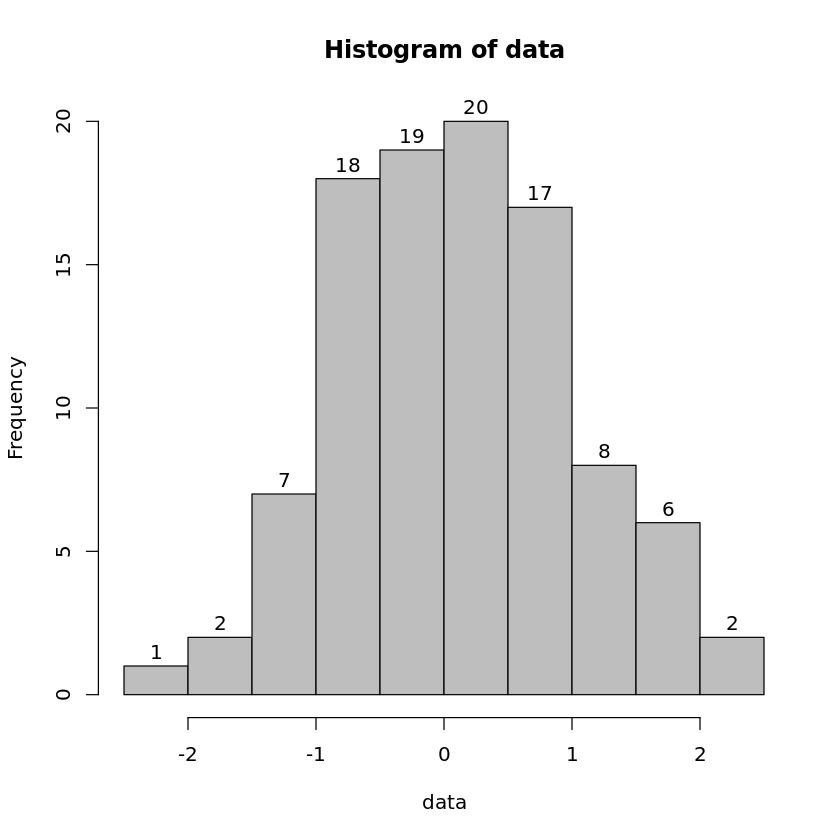


  The decimal point is at the |

  -2 | 30
  -1 | 7
  -1 | 4110000000
  -0 | 9998887766655555555
  -0 | 433332222111000
   0 | 000011112223334444
   0 | 5555566666778999
   1 | 0000112234
   1 | 5678889
   2 | 12



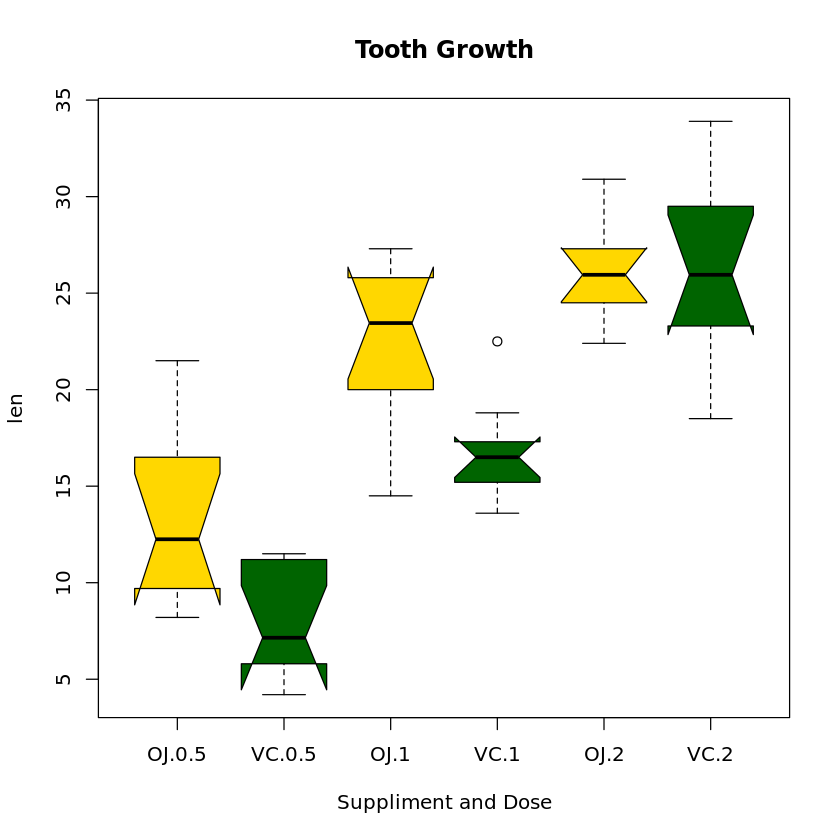

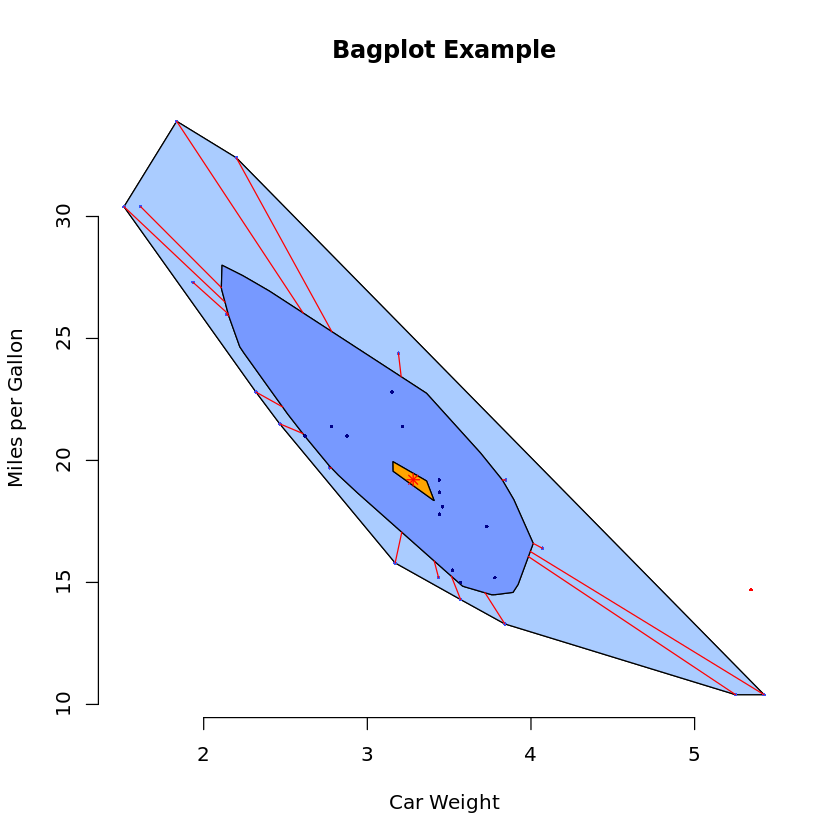

In [1]:
data = rnorm(100)

# Histogram
hist(data,labels = T, col='grey', breaks = 12)

# Interactive histogram
# pacman::p_load("highcharter")
# hchart(data)

# Box-and-Whisker plot
boxplot(len~supp*dose, data=ToothGrowth, notch=TRUE,
        col=(c("gold","darkgreen")),
        main="Tooth Growth", xlab="Suppliment and Dose")
# If notches differ -> medians differ

# Stem-and-Leaf Plots
stem(data)

#Bagplot - A 2D Boxplot Extension
pacman::p_load(aplpack)
attach(mtcars)
bagplot(wt,mpg, xlab="Car Weight", ylab="Miles per Gallon",
main="Bagplot Example")

## Normality Assessment

Since Normal (Gaussian distribution has many applications, we tipically want/wish our data or our variable is normal. Hence, we have to assess the normality based on not only Numerical Mesures but also Graphical mesures.

Installing package into ‘/home/bbellanger/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)

Warning message:
“package ‘Car’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“Perhaps you meant ‘car’ ?”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘Car’”
Warning message in pacman::p_load("Car"):
“Failed to install/load:
Car”


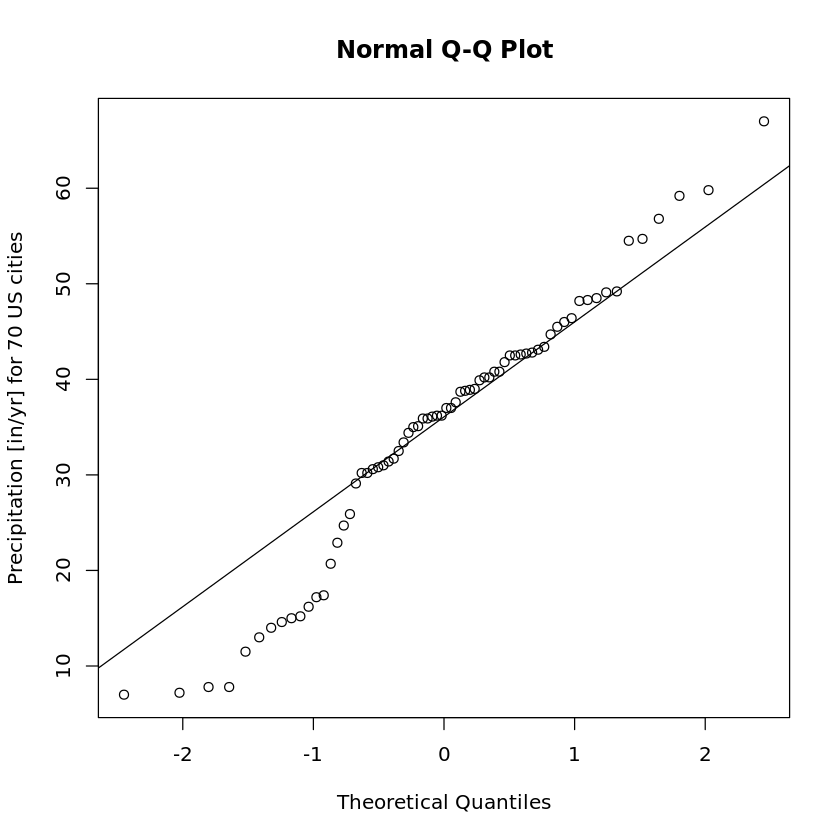

In [2]:
pacman::p_load("Car")
qqnorm(precip, ylab = "Precipitation [in/yr] for 70 US cities")
qqline(precip)

## Summary statistics
Sometimes it’s hard to tell whether your data follow the normal distribution by just looking at the graph. Hence, we often have to conduct statistical test to aid our decision. Common tests are

    Methods based on normal probability plot
        Correlation Coefficient with Normal Probability Plots
        Shapiro-Wilk Test

    Methods based on empirical cumulative distribution function
        Anderson-Darling Test
        Kolmogorov-Smirnov Test
        Cramer-von Mises Test
        Jarque–Bera Test


### Method based on probability plot

#### Correlation coefficient with Normal Probability Plots

When the correlation is 1, the plot is exactly linear and normality is assumed. The closer the correlation is to zero, the more confident we are to reject normality. Inference on W* needs to be based on special tables (Looney and Gulledge Jr 1985).

In [3]:
library("EnvStats")
gofTest(data,test="ppcc")$p.value #Probability Plot Correlation Coefficient


Attaching package: ‘EnvStats’


The following objects are masked from ‘package:stats’:

    predict, predict.lm




[1] 0.6167652

#### Shapiro-Wilk Test
Researchers tipically use this test to assess normality. (n < 2000) Under normality, W is close to 1, just like W*. Notice that the only difference between W and W* in the "Weights".

In [4]:
gofTest(data,test="sw")$p.value #Saphiro-Wilk is the default.

[1] 0.6020074

### Methods based on empirical cumulative distribution function

The empirical Cumulative Distribution Function is CDF:
Fn(t) = estimate of probability that an observation ≤ t = (number of observation ≤ t)/n
This method requires large sample sizes. However, it can apply to distributions other than the normal (Gaussian) one.

The empirical distribution function is an estimate of the cumulative distribution function that generated the points in the sample. It converges with probability 1 to that underlying distribution, according to the Glivenko–Cantelli theorem. A number of results exist to quantify the rate of convergence of the empirical distribution function to the underlying cumulative distribution function. 

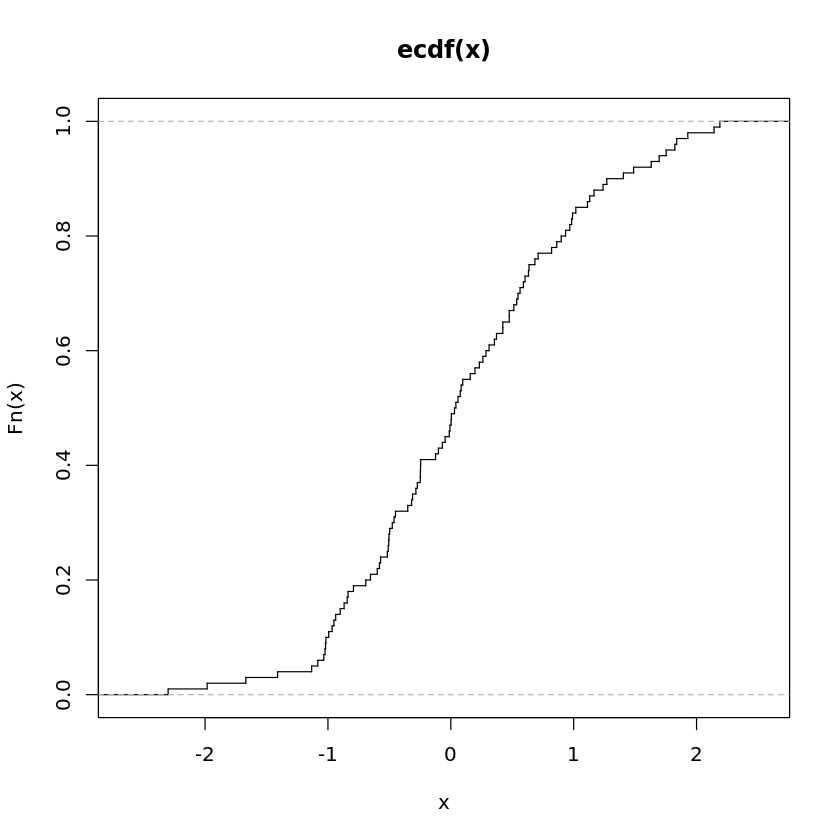

In [5]:
# Empirical CDF hand-code
plot.ecdf(data,verticals = T, do.points=F)

#### Anderson-Darling Test

Is a weight average of quared deviations (it weights small and large values of t more). It reject normal assumption when A² is too large. Evaluate the null hypothesis that the observations are ramdomly selected from a normal population basde on the critical value provided by (Marsaglia and Marsaglia 2004) and (Stephens 1974).

The test can be applied to other distributions: exponential, logistic, Gumbel, Extreme-value, Weibull: log(Weibull) = Gumbel, gamma, logistic, Cauchy, von Mises, Log-normal (two-parameter).

In [6]:
gofTest(data,test="ad")$p.value #Anderson-Darling

[1] 0.5441634

#### Kolmogorov-Smirnov Test

Based on the largest absolution difference between empirical and expected cumulative distribution.

In [7]:
gofTest(data,test="ks")$p.value

Warning message in ksGofTest(x = c(-0.0464099511269621, 0.603992057931535, -0.936968542426562, :
“The standard Kolmogorov-Smirnov test is very conservative (Type I error smaller than assumed; high Type II error) for testing departures from the Normal distribution when you have to estimate the distribution parameters.

”


[1] 0.9028663

#### Cramer-von Mises Test

Based on the average squared discrepancy between the empirical distribution and a given theoretical distribution. Each discrepancy is weighted equally (unlike Anderson-Darling test weights end points more heaviliy).

In [8]:
gofTest(data,test="cvm")$p.value #Cramer-von Mises

[1] 0.6630918

# Bivariate statistics

## Two continuous

In [9]:
n = 100 # sample size
data = data.frame(A = sample(1:20, replace = TRUE, size = n),
                  B = sample(1:30, replace = TRUE, size = n))

# data

### Pearson Correlation
Good with linear relationship.

The Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the covariance of the two variables divided by the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations.

In [10]:
library(Hmisc)
rcorr(data$A, data$B, type="pearson")


Attaching package: ‘Hmisc’


The following object is masked from ‘package:EnvStats’:

    stripChart


The following objects are masked from ‘package:base’:

    format.pval, units




      x     y
x  1.00 -0.03
y -0.03  1.00

n= 100 


P
  x      y     
x        0.8039
y 0.8039       

## Spearman Correlation

It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. 

In [11]:
library(Hmisc)
rcorr(data$A, data$B, type="spearman")

      x     y
x  1.00 -0.04
y -0.04  1.00

n= 100 


P
  x     y    
x       0.659
y 0.659      

## Categorical and continuous

### Point-Biserial Correlation

Similar to the Pearson correlation coefficient, the point-biserial correlation coefficient is between -1 and 1 where: -1 means a perfectly negative correlation between two variable. 0 means no correlation between two variables. 1 means a perfectly positive correlation between two variables.

In [12]:
x <- c(0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0)
y <- c(12, 14, 17, 17, 11, 22, 23, 11, 19, 8, 12)

# Calculate point-biserial correlation
cor.test(x, y)


	Pearson's product-moment correlation

data:  x and y
t = 0.67064, df = 9, p-value = 0.5193
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.4391885  0.7233704
sample estimates:
      cor 
0.2181635 


In [13]:
# Alternatively
ltm::biserial.cor(y,x, use = c("all.obs"), level = 2)

[1] 0.2181635

## Two discrete

### Distance metrics

Some consider **distance** is not a correlation metric because it **isn’t unit independent** (i.e., if you scale the distance, the metrics will change), **but** it’s still a **useful proxy**. Distance metrics are more likely to be used **for similarity measure**.

Euclidian distance, Manhattan distance, Chessboard distance, Cnaberra distance, Hamming distance, Cosine distance, Sum of Absolute distance, Sum Squared Distance, Mean-Absolute Error.

### Statistical metrics

#### Phi coefficient

In [14]:
# Binary
dt = matrix(c(1, 4, 3, 5), nrow = 2)
dt

# Cramer's V
library("lsr")
n = 100 # (sample size)
set.seed(1)
data = data.frame(A = sample(1:5, replace = TRUE, size = n),
                  B = sample(1:6, replace = TRUE, size = n))

cramersV(data$A, data$B)

1,3
4,5



Attaching package: ‘lsr’


The following object is masked from ‘package:EnvStats’:

    longToWide


Warning message in stats::chisq.test(...):
“Chi-squared approximation may be incorrect”


[1] 0.1944616

In [15]:
DescTools::CramerV(data, conf.level = 0.95,method = "ncchisq") # noncentral Chi-square
DescTools::CramerV(data, conf.level = 0.95,method = "ncchisqadj") # Adjusted noncentral Chi-square
DescTools::CramerV(data, conf.level = 0.95,method = "fisher") # Fisher Z transformation
DescTools::CramerV(data, conf.level = 0.95,method = "fisheradj") # Bias correction Fisher z transformation

Registered S3 method overwritten by 'DescTools':
  method       from   
  plot.bagplot aplpack



Cramer V     lwr.ci     upr.ci 
0.34723250 0.00000000 0.09060354

Cramer V    lwr.ci    upr.ci 
0.3472325 0.3929964 0.4033053

Cramer V    lwr.ci    upr.ci 
0.3472325 0.2772473 0.4135525

Cramer V    lwr.ci    upr.ci 
0.3472325 0.2774977 0.4137774

In [22]:
# 2 nominal variables
DescTools::TschuprowT(data)

[1] 0.1100808

### Ordinal Association (Rank correlation)

This kind of test is good with non linear realtionship (Analyse according to the rank of the variable).

### Ordinal and Nominal variables

In [23]:
n = 100 # Sample size
set.seed(1)
dt = table(data.frame(
    A = sample(1:4, replace = TRUE, size = n), # ordinal
    B = sample(1:3, replace = TRUE, size = n) # nominal
))

dt

   B
A    1  2  3
  1  7 11  9
  2 11  6 14
  3  7 11  4
  4  6  4 10

#### Freeman's Theta

Freeman's coefficent of differentiation (theta) is used as a measure of association for a two-way table with one ordinal and one nominal variable. See Freeman (1965). Because theta is always positive, if type="perc", the confidence interval will never cross zero, and should not be used for statistical inference. However, if type="norm", the **confidence interval may cross zero**.

A single statistic, Freeman's theta. Or a small data frame consisting of Freeman's theta, and the lower and upper confidence limits.

In [24]:
# Ordinal and Nominal

# This package is not supposed to be available for R >= 4.0.0
# But it was working on my version of R = 4.4.1

rcompanion::freemanTheta(dt, group = "column")
# because column is the grouping variable (i.e., nominal)

Freeman.theta 
       0.0472

#### Epsilon-Squared

Epsilon squared is a **measure of effect size** (Kelly, 1935). It is one of the least common measures of effect sizes: omega squared and eta squared are used more frequently. The formula is basically the same as that for omega squared, except that there is one less term in the denominator.

The Dictionary of Statistics & Methodology (Vogt, 2005) defines epsilon squared as “another name for adjusted R2“. Frieman et. al state something similar: “Epsilon squared (ε2) is the adjusted R2 reported in many data analysis programs.” A glance at the two formulas for adjusted R2 and ε2 may cause you to think they are completely different, when in fact they are equivalent—at least, in SPSS. Adjusted r-squared is the term used for regression analysis calculations, while the equivalent formula is called epsilon-squared in ANOVA (Allen, 2017, p. 382).

In [25]:
# Epsilon-squared
rcompanion::epsilonSquared(dt, group = "column")
# because the column is the grouping variable (i.e., nominal)

epsilon.squared 
        0.00355

### Two ordinal variables

In [26]:
# Two Ordinal

n = 100
set.seed(1)
dt = table(data.frame(
    A = sample(1:4, replace = TRUE, size = n), # ordinal
    B = sample(1:3, replace = TRUE, size = n) # ordinal
))

# dt

#### Goodman Kruskal's Gamma

It measures the **strength of association** of the cross tabulated data when both variables are measured at the ordinal level. It makes no adjustment for either table size or ties. Values range from −1 (100% negative association, or perfect inversion) to +1 (100% positive association, or perfect agreement). A value of zero indicates the absence of association.
The estimate of gamma, G, depends on two quantities:
- Ns, the number of pairs of cases **ranked in the same order** on both variables (number of concordant pairs),
- Nd, the number of pairs of cases **ranked in reversed order** on both variables (number of reversed pairs),

where "ties" (cases where either of the two variables in the pair are equal) are dropped.

In [27]:
## 2 ordinal variables
DescTools::GoodmanKruskalGamma(dt, conf.level = 0.95)

gamma       lwr.ci       upr.ci 
 0.006781013 -0.229032069  0.242594095

#### Somer's D

Somers' D is the parameter behind many **nonparametric methods**. It is also used as a quality measure of **binary choice** or **ordinal regression** (e.g., logistic regressions) and credit scoring models. 